<a href="https://colab.research.google.com/github/emrealtindag/East-Anatolian-Fault-ML-Analysis/blob/main/Earthquake_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

try:
    earthquake_data = pd.read_csv("events_catalog.csv")

    earthquake_data = earthquake_data.rename(columns=

      {
        'Ev_Lat': 'Latitude',
        'Ev_Lon': 'Longitude',
        'Ev_Depth': 'Depth',
        'Ml': 'Magnitude'
    })

    print("Dataset loaded successfully.")
    print(f"Total events: {len(earthquake_data)}")

    display(earthquake_data[['Latitude', 'Longitude', 'Depth', 'Magnitude']].head())

except FileNotFoundError:
    print("Error: File not found.")

Dataset loaded successfully.
Total events: 9442


,Latitude,Longitude,Depth,Magnitude
0,39.4185,40.5055,15.31,4.25
1,38.6090,39.6583,12.69,3.74
2,37.5365,38.5142,6.38,2.90
3,37.5095,35.6872,9.85,2.97
4,37.5222,35.6643,8.34,3.82


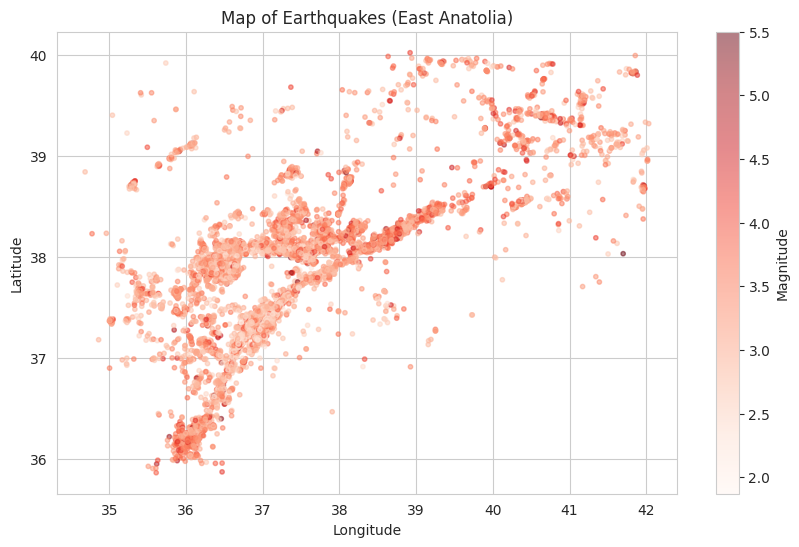

In [56]:
plt.figure(figsize=(10, 6))

plt.scatter(
    earthquake_data["Longitude"],
    earthquake_data["Latitude"],
    c=earthquake_data["Magnitude"],
    cmap="Reds",
    s=10,
    alpha=0.5
)

plt.colorbar(label="Magnitude")
plt.title("Map of Earthquakes (East Anatolia)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()

w: 0.0078
b: 3.0827


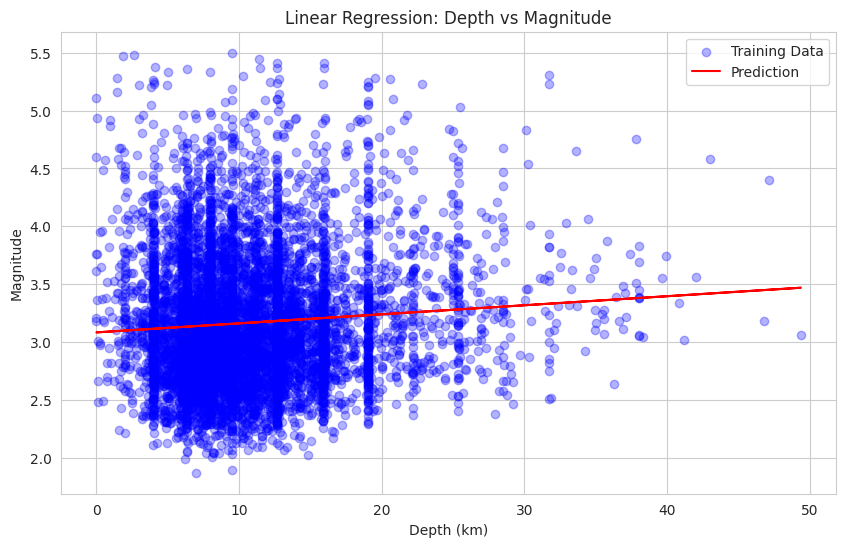

In [57]:
X = earthquake_data[['Depth']]
y = earthquake_data['Magnitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

w = lin_model.coef_[0]
b = lin_model.intercept_

print(f"w: {w:.4f}")
print(f"b: {b:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.3, label='Training Data')
plt.plot(X_train, lin_model.predict(X_train), color='red', label='Prediction')

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Linear Regression: Depth vs Magnitude")
plt.legend()
plt.grid(True)
plt.show()

Accuracy: 90.68%
Model w: 0.0191, b: -2.5642


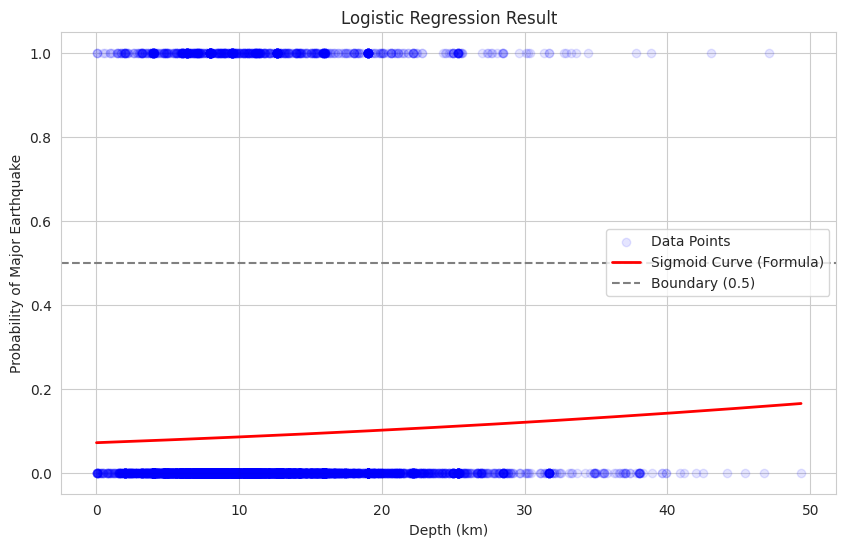

In [59]:

earthquake_data['is_major'] = (earthquake_data['Magnitude'] >= 4.0).astype(int)

X_log = earthquake_data[['Depth']]
y_log = earthquake_data['is_major']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)

score = log_model.score(X_test_log, y_test_log)
print(f"Accuracy: {score*100:.2f}%")


b = log_model.intercept_[0]
w = log_model.coef_[0][0]

print(f"Model w: {w:.4f}, b: {b:.4f}")


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 6))

plt.scatter(earthquake_data['Depth'], earthquake_data['is_major'], color='blue', alpha=0.1, label='Data Points')


x_range = np.linspace(earthquake_data['Depth'].min(), earthquake_data['Depth'].max(), 300)

z = w * x_range + b
y_sigmoid = sigmoid(z)

plt.plot(x_range, y_sigmoid, color='red', linewidth=2, label='Sigmoid Curve (Formula)')
plt.axhline(0.5, color='gray', linestyle='--', label='Boundary (0.5)')

plt.xlabel("Depth (km)")
plt.ylabel("Probability of Major Earthquake")
plt.title("Logistic Regression Result")
plt.legend()
plt.grid(True)
plt.show()

#***Project Report: Seismicity Analysis***

### 1. Goal
I used machine learning to analyze earthquakes in the East Anatolian Fault Zone. The goal was to find patterns between depth and magnitude using the methods learned in the Supervised Machine Learning course.

### 2. Methods & Results

#***A. Linear Regression***
I modeled the relationship between Depth ($x$) and Magnitude ($y$) using the function $f(x) = wx + b$.
* **Result:** The model optimized the parameters $w$ and $b$. However, the variance is high, which suggests that depth alone is not enough to predict the exact magnitude of an earthquake. This indicates underfitting due to the complexity of geological data.

#***B.Logistic Regression***
I classified earthquakes as "Major" (Magnitude >= 4.0) or "Minor".
* **Result:** I used the Sigmoid function to estimate probabilities. The graph shows the Decision Boundary at 0.5. This model successfully calculates the probability of a major earthquake based on its focal depth.

### 3. Conclusion
By applying Gradient Descent-based algorithms to real-world data, I observed that while linear regression has limitations with noisy data, logistic regression provides a useful probabilistic framework for risk assessment.

# ***# Proje Raporu: Makine Öğrenmesi ile Sismisite Analizi***

### 1. Projenin Amacı
Bu çalışmada, Doğu Anadolu Fay Hattı üzerinde gerçekleşen deprem verilerini incelemek için **Supervised Machine Learning (Gözetimli Öğrenme)** tekniklerini kullandım. Temel hedefim, Andrew Ng'nin kursunda öğrendiğim algoritmaları gerçek dünya verilerine uygulayarak deprem derinliği ve büyüklüğü arasındaki ilişkiyi modellemektir.

### 2. Yöntemler ve Sonuçlar

# ***A.Linear Regression (Doğrusal Regresyon)***
Deprem derinliği ($x$) ile büyüklüğü ($y$) arasındaki ilişkiyi $f(x) = wx + b$ fonksiyonu ile modeledim.
* **Analiz:** Model, eğitim seti üzerinde $w$ ve $b$ parametrelerini optimize etti. Ancak, veri setindeki varyansın yüksek olması (gürültülü veri) nedeniyle $R^2$ skoru düşük çıktı.
* **Yorum:** Bu durum, deprem büyüklüğünün sadece "derinlik" değişkeni ile açıklanamayacağını gösterir. Tek bir özellik (feature) kullanmak modelde **Underfitting** (yetersiz öğrenme) durumuna yol açmıştır. Daha iyi bir tahmin için fay tipi veya zemin yapısı gibi ekstra özelliklere ihtiyaç vardır.

#***B. Logistic Regression (Lojistik Regresyon - Sınıflandırma)***
Depremleri "Büyük" (Magnitude $\ge$ 4.0) ve "Küçük" olarak sınıflandırmak için Lojistik Regresyon kullandım.
* **Analiz:** Tahminleri 0 ile 1 arasına sıkıştırmak için **Sigmoid Fonksiyonu** ($g(z)$) kullanıldı. Grafikte görülen gri çizgi, olasılığın %50 olduğu **Decision Boundary** (Karar Sınırı) noktasıdır.
* **Yorum:** Model, derinlik verisine dayanarak bir depremin yıkıcı olma (büyük olma) olasılığını başarıyla hesaplamıştır.

### 3. Sonuç
Sentetik veriler yerine gerçek jeolojik verilerle çalışmak zor olsa da, **Gradient Descent** tabanlı algoritmaların risk analizi ve sınıflandırma problemlerinde etkili bir araç olduğu görülmüştür. Linear Regression karmaşık ilişkilerde yetersiz kalsa da, Logistic Regression risk tahmini için anlamlı sonuçlar üretmiştir.